In [64]:
%pip install geopandas
%pip install matplotlib
%pip install pandas
%pip install seaborn


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [65]:
# Import the modules

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Load PH map
gdf_ph = gpd.read_file("./data/geodata/ph.json")
# Rearrange rows depending on region list to prepare to merge to a single dataframe
gdf_ph = gdf_ph.iloc[[11, 12, 13, 10, 9, 6, 5, 8, 15, 14, 7, 4, 2, 0, 16, 1, 3]]
gdf_ph = gdf_ph[["geometry"]].reset_index(drop=True)
# print(gdf_ph)


# Load crime data
df = pd.read_csv("./data/reinforced_dataset.csv")

# Index + Nonindex
df["crime"] = df[["index_crime", "nonindex_crime"]].sum(axis=1)
region_avg = df.groupby("region")["crime"].mean().reset_index()
region_list = [
    "ncr",
    "car",
    "1",
    "2",
    "3",
    "4a",
    "4b",
    "5",
    "6",
    "7",
    "8",
    "9",
    "10",
    "11",
    "12",
    "13",
    "barmm"
]
# Sort according to region list
region_avg["region"] = pd.Categorical(region_avg["region"], categories=region_list, ordered=True)
region_avg = region_avg.sort_values("region").reset_index(drop=True)

gdf = pd.concat([region_avg, gdf_ph], axis=1)
gdf = gpd.GeoDataFrame(gdf, geometry='geometry')
print(combined_df)

   region         crime                                           geometry
0     ncr  53552.285714  POLYGON ((121.15427 14.75843, 121.14348 14.742...
1     car   2528.571429  POLYGON ((120.95709 18.44678, 120.98303 18.455...
2       1   8660.857143  MULTIPOLYGON (((120.8865 16.10067, 120.91699 1...
3       2   6483.857143  MULTIPOLYGON (((122.24464 16.51057, 122.03754 ...
4       3  19313.000000  POLYGON ((121.44618 15.20793, 121.44606 15.207...
5      4a  27978.000000  MULTIPOLYGON (((120.9608 14.49523, 120.97291 1...
6      4b   3511.285714  MULTIPOLYGON (((118.41529 9.67772, 118.42026 9...
7       5   9640.000000  MULTIPOLYGON (((122.558 13.93328, 122.56092 13...
8       6  11142.571429  MULTIPOLYGON (((123.36573 10.39251, 123.34671 ...
9       7  26060.857143  MULTIPOLYGON (((123.71534 9.14517, 123.7033 9....
10      8   5476.857143  MULTIPOLYGON (((125.28517 9.91694, 125.27394 9...
11      9   5443.428571  MULTIPOLYGON (((123.68897 7.9683, 123.68897 7....
12     10   7507.142857  

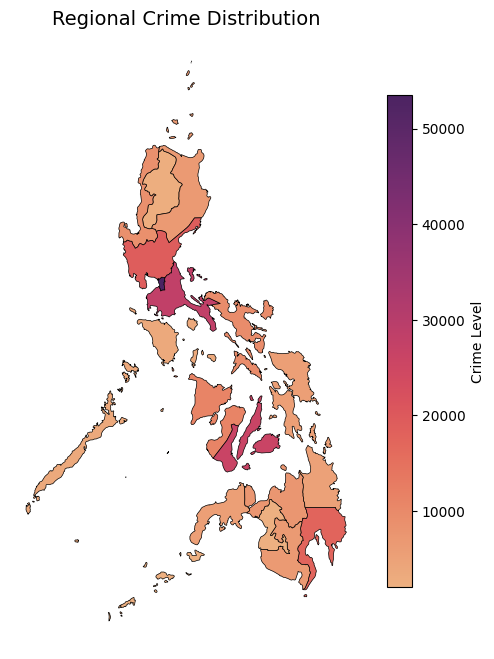

In [67]:
# Plot choropleth

colors_heat1 = sns.color_palette('flare_r', as_cmap=True)

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
g = gdf.plot(column='crime', cmap='flare', legend=True, 
    legend_kwds={
        "label": "Crime Level",
        "orientation": "vertical",
        "shrink": 0.8,
        "pad": 0.02,
        }, 
    edgecolor="black",
    linewidth=0.5,
    ax=ax)
g.set_axis_off()
g.spines[['left', 'bottom', 'right', 'top', ]].set_visible(False)

plt.title("Regional Crime Distribution", fontsize=14)
plt.show()